# SECTION 01. 수치형 데이터 정제하기

   
## 1. 결측치 파악하기

In [1]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
df=pd.read_csv("Clean_Dataset.csv")

# 지정 인덱스인 첫번째 칼럼(column) 삭제하기
df.drop([df.columns[0]], axis=1, inplace=True)

In [2]:
# 랜덤하게 결측치 생성하기
# 랜덤과 넘파이 불러오기
import random
import numpy as np

# 같은 결과 출력을 위해 시드 고정하기
random.seed(2023)
np.random.seed(2023)

# 랜덤한 위치에 결측치를 5000개를 포함한 데이터 df_na 생성하기(5,000개 결측치 생성)
df_na=df.copy()
for i in range(0,5000) :
    df_na.iloc[random.randint(0,300152), random.randint(0,10)]=np.nan

# 결측치 처리여부 확인을 위한 1번, 3번 인덱스 전체 결측치 처리하기(2개 결측치 생성)
df_na.iloc[1]=np.nan
df_na.iloc[3]=np.nan

### 1) 결측치 존재 여부 확인하기 

In [3]:
# 데이터 정보 확인하기
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


### 2) 결측치 수 확인하기

In [4]:
# 결측치 수 확인하기 
df_na.isnull().sum(axis=0)

airline             468
flight              464
source_city         472
departure_time      430
stops               487
arrival_time        455
destination_city    483
class               438
duration            450
days_left           430
price               439
dtype: int64

## 2. 결측치 처리하기

In [ ]:
# 데이터 변경에 대비하여 원본 데이터 복사하기
df_na_origin=df_na.copy()

### 1) 결측치 삭제하기

In [6]:
# 결측치를 하나라도 가지는 행 모두 삭제하기
df_na=df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295192 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295192 non-null  object 
 1   flight            295192 non-null  object 
 2   source_city       295192 non-null  object 
 3   departure_time    295192 non-null  object 
 4   stops             295192 non-null  object 
 5   arrival_time      295192 non-null  object 
 6   destination_city  295192 non-null  object 
 7   class             295192 non-null  object 
 8   duration          295192 non-null  float64
 9   days_left         295192 non-null  float64
 10  price             295192 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.0+ MB


In [7]:
# 결측치 삭제하기전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# 모든 데이터가 결측치인 행만 삭제하기
df_na=df_na.dropna(how='all')
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300151 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


In [8]:
# 0번 인덱스 부터 5개의 데이터를 불러와서 1번 3번 인덱스 삭제 결과 확인하기
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0


### 2) 칼럼 제거하기

In [9]:
# 결측치 삭제하기전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# stops과 flight 제거하기
df_na=df_na.drop(['stops','flight'], axis=1)
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   source_city       299681 non-null  object 
 2   departure_time    299723 non-null  object 
 3   arrival_time      299698 non-null  object 
 4   destination_city  299670 non-null  object 
 5   class             299715 non-null  object 
 6   duration          299703 non-null  float64
 7   days_left         299723 non-null  float64
 8   price             299714 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.6+ MB


In [10]:
# 결측치를 하나라도 가지는 행 모두 삭제하기
df_na=df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296124 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           296124 non-null  object 
 1   source_city       296124 non-null  object 
 2   departure_time    296124 non-null  object 
 3   arrival_time      296124 non-null  object 
 4   destination_city  296124 non-null  object 
 5   class             296124 non-null  object 
 6   duration          296124 non-null  float64
 7   days_left         296124 non-null  float64
 8   price             296124 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.6+ MB


### 3) 결측치 대체하기

In [11]:
df_na=df_na_origin.copy()

# 칼럼별 평균값으로 결측치 대체하기 
df_na=df_na.fillna(df_na.mean())
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [12]:
# 0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


In [13]:
# bfill을 이용한 결측치 대체하기
df_na=df_na.fillna(method='bfill')
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [14]:
#0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기
df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


## 3. 이상치 파악하기

### 1) z-score로 확인하기

In [15]:
# Z-score를 기준으로 신뢰 수준이 95%인 데이터 확인하기
df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206691,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Business,12.42,1,74640
206692,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Business,14.67,1,74640
206693,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,24.42,1,74640
206694,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,26.00,1,74640
206695,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Business,26.67,1,74640
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 2) IQR(Inter Quartile Range)로 확인하기

In [16]:
# IQR 기준 이상치 확인하는 함수 만들기
def findOutliers(x, column):

    # 제1사분위수 q1 구하기
    q1 = x[column].quantile(0.25)

    # 제3사분위수 q3 구하기
    q3 = x[column].quantile(0.75)

    # IQR의 1.5배수 IQR 구하기
    iqr = 1.5 * (q3 - q1)

    # 제3사분위수에서 IQR의 1.5배보다 크거나 제1사분위수에서 IQR의 1.5배보다 작은값만 저장한 데이터 y 만들기
    y=x[(x[column] > (q3 + iqr)) | (x[column] < (q1 - iqr))]

    # IQR기준 이상치 y 반환하기
    return len(y)

In [17]:
# price, duration, days_left 에 대하여 IQR기준 이상치 개수 확인하기
print("price IQR Outliers : ",findOutliers(df,'price'))
print("durationIQR Outliers : ",findOutliers(df,'duration'))
print("days_left IQR Outliers : ",findOutliers(df,'days_left'))

price IQR Outliers :  123
durationIQR Outliers :  2110
days_left IQR Outliers :  0


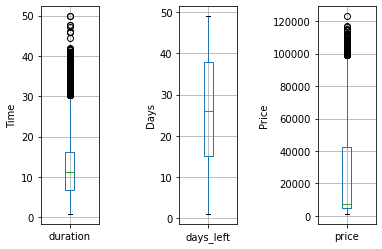

In [18]:
# 시각화를 위해 matplotlib.pyplot 불러오기
import matplotlib.pyplot as plt

plt.figure()
# 첫 번째 subplot : 1행 5열로 나눈영역에서 첫번째 영역
plt.subplot(151)
df[['duration']].boxplot()
plt.ylabel("Time")

# 두 번째 subplot : 1행 5열로 나눈영역에서 세번째 영역
plt.subplot(153)
df[['days_left']].boxplot()
plt.ylabel("Days")

# 세 번째 subplot : 1행 5열로 나눈영역에서 다섯번째 영역
plt.subplot(155)
df[['price']].boxplot()
plt.ylabel("Price")
plt.show()

## 4. 이상치 처리하기

In [19]:
# 데이터 변형에 대비하여 데이터 원본 복사해두기
df_origin=df.copy()

### 1) 이상치 데이터 삭제하기

In [20]:
# 신뢰도 95% 기준 이상치 Index 추출하기
outlier=df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96].index

# 추출한 인덱스의 행 삭제해서 clean_df 데이터 만들기 
clean_df=df.drop(outlier)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287660 entries, 0 to 300146
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           287660 non-null  object 
 1   flight            287660 non-null  object 
 2   source_city       287660 non-null  object 
 3   departure_time    287660 non-null  object 
 4   stops             287660 non-null  object 
 5   arrival_time      287660 non-null  object 
 6   destination_city  287660 non-null  object 
 7   class             287660 non-null  object 
 8   duration          287660 non-null  float64
 9   days_left         287660 non-null  int64  
 10  price             287660 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.3+ MB


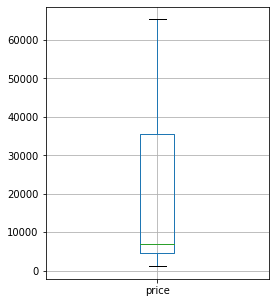

In [21]:
plt.figure(figsize=(4,5))

# 박스 그래프 활용하여 이상치 제거 여부 확인하기
clean_df[['price']].boxplot()
plt.show()

### 2) 이상치 데이터 대체하기

In [22]:
# IQR 기준 이상치를 대체하는 함수 만들기
def changeOutliers(x, column):

    # 제1사분위수 q1 구하기
    q1 = x[column].quantile(0.25)

    # 제3사분위수 q3 구하기
    q3 = x[column].quantile(0.75)

    # IQR의 1.5배수 IQR 구하기  
    iqr = 1.5 * (q3 - q1)

    # 이상치를 대체할 Min, Max값 설정하기
    Min=(q1 - iqr) 
    Max = q3 + iqr

    # Max보다 크값은 Max로, Min보다 작은값은 Min으로 대체하기
    x.loc[(x[column] > Max), column]= Max
    x.loc[(x[column] < Min), column]= Min
    
    # x리턴하기
    return(x)

# price에 대하여 이상치 대체하기
clean_df=changeOutliers(df, 'price')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 25.2+ MB


In [23]:
# price에 대하여 IQR기준 이상치 개수 확인하기
print("price IQR Outliers : ",findOutliers(clean_df,'price'))

price IQR Outliers :  0


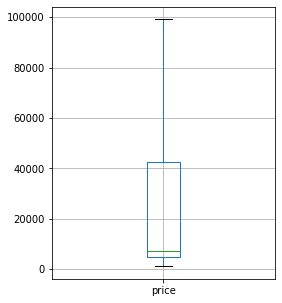

In [24]:
plt.figure(figsize=(4,5))

# 박스그래프 활용하여 이상치 대체 여부 확인하기
clean_df[['price']].boxplot()
plt.show()

## 5. 구간화(binning)하기

### 1) 동일 길이로 구간화하기

In [25]:
# 비행시간을 0~5, 5~10, 10 이상의 3개의 구간으로 나누어 거리(distance)) 칼럼 생성하기
df['distance']=pd.cut(df['duration'], bins=[0,5,10,df['duration'].max()], labels=['short','medium' ,'long'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,short
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,short
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,short
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,short
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,short


In [26]:
# 거리 칼럼의 빈도분포 확인하기
df['distance'].value_counts()

long      169879
medium     84761
short      45513
Name: distance, dtype: int64

### 2) 동일 개수로 구간화하기

In [27]:
# 항공권 가격(price)를 4개 구간으로 동일하게 나누어 항공권 가격 비율 칼럼 생성하기
df['price_rate']=pd.qcut(df['price'], 4, labels=['cheap','nomal' ,'expensive', 'too expensive'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance,price_rate
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,short,nomal
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,short,nomal
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,short,nomal
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,short,nomal
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,short,nomal


In [28]:
# 항공권 가격 비율 칼럼의 빈도 분포 확인하기
df['price_rate'].value_counts()

expensive        75584
nomal            75117
cheap            75073
too expensive    74379
Name: price_rate, dtype: int64

# SECTION 02. 범주형 데이터 정제하기

## 1. 레이블 인코딩 하기

### 1) 판다스에서 레이블 인코딩하기

In [29]:
# 데이터 구간화 전 원본 불러오기
df=df_origin.copy()

# factorize로 airline 칼럼 레이블 인코딩하기
df["label_encoding"] = pd.factorize(df["airline"])[0].reshape(-1,1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2


In [30]:
# airline 칼럼과 새롭게 만들어진 label_encoding 칼럼의 빈도표 확인하기
print(df['airline'].value_counts())
print(df['label_encoding'].value_counts())

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
2    127859
5     80892
4     43120
3     23173
1     16098
0      9011
Name: label_encoding, dtype: int64


### 2) 사이킷런으로 레이블 인코딩하기

In [31]:
# 사이킷런 패키지의 LabelEncoder 불러오기
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 airline 칼럼 레이블 인코딩하기
le = LabelEncoder()
df["airline_Label_Encoder"] = le.fit_transform(df['airline'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,5
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,5


In [32]:
# airline 칼럼과 새롭게 만들어진 airline_Label_Encoder 칼럼의 빈도표 확인하기
print(df['airline'].value_counts())
print(df['airline_Label_Encoder'].value_counts())

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline_Label_Encoder, dtype: int64


In [33]:
# 레이블 인코딩 역변환(디코딩)하기
le.inverse_transform(df["airline_Label_Encoder"]).reshape(-1,1)

array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Vistara']], dtype=object)

## 2. 원핫 인코딩 하기

### 1) 판다스에서 원핫 인코딩하기

In [34]:
#레이블 인코딩 전 원본데이터 불러오기
df=df_origin.copy()

#class 칼럼을 원핫인코딩 하기 
pd.get_dummies(df['class'])

,Business,Economy
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
300148,1,0
300149,1,0
300150,1,0
300151,1,0


In [35]:
# 원핫 인코딩 결과를 데이터에 반영하기
df=pd.get_dummies(df, columns=['class'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,0,1


### 2) 사이킷런으로 원핫 인코딩하기

In [36]:
#판다스 원핫인코딩 전 원본데이터 불러오기
df=df_origin.copy()

#사이킷런 패키지에서 OneHotEncoder 불러오기
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder로 원핫 인코딩 하기
oh = OneHotEncoder()
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray()

#원핫인코딩 결과를 데이터프레임으로 만들기
df_OneHot = pd.DataFrame(encoder, columns=["class_" + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

#원핫 인코딩 결과를 원본 데이터에 붙여넣기
df1 = pd.concat([df, df_OneHot], axis=1)
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,1.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,1.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0.0,1.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,1.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,1.0


# SECTION 03. 스케일링 하기

## 1. 정규화하기

In [37]:
# 원핫 인코딩 전 원본데이터 불러오기
df=df_origin.copy()

# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num = df[['duration', 'days_left', 'price']]

# 정규화 수식적용하기
df_num = (df_num - df_num.min())/(df_num.max()-df_num.min())
df_num.head()

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765


In [38]:
# 요약 데이터 확인해서 정규화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,0.232470,0.520932,0.162215
std,0.146775,0.282521,0.186099
min,0.000000,0.000000,0.000000
25%,0.122449,0.291667,0.030156
50%,0.212653,0.520833,0.051818
75%,0.313061,0.770833,0.339570
max,1.000000,1.000000,1.000000


## 2. 표준화하기

In [39]:
# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num = df[['duration', 'days_left', 'price']]

# 표준화 수식 적용하기
df_num =(df_num  - df_num .mean())/df_num .std()
df_num.head()

,duration,days_left,price
0,-1.397528,-1.843872,-0.658067
1,-1.375282,-1.843872,-0.658067
2,-1.397528,-1.843872,-0.657935
3,-1.386405,-1.843872,-0.657979
4,-1.375282,-1.843872,-0.657979


In [40]:
# 요약 데이터 확인해서 표준화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,7.726764e-17,9.393321e-17,-6.060207e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


In [41]:
# 기존의 duration, days_left, price 칼럼 삭제하기
df=df.drop(['duration', 'days_left', 'price'], axis=1)

# 표준화된 duration, days_left, price 칼럼 붙이기
df = pd.concat([df, df_num], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979


# SECTION 04. 변수 선택하기


## 1. 신규 변수 생성하기

### 1) 하나의 데이터로 여러 개의 새로운 칼럼 만들기

In [42]:
# 항공기 기종을 제조사 코드와 모델명으로 분리하는 split_flight 함수 만들기
def split_flight(flight) :
    # "-" 문자를 기준으로 앞쪽을 제조사 코드로 저장
    manufacture = flight.split("-")[0]
    # "-" 문자를 기준으로 뒤쪽을 모델명으로 저장
    model = flight.split("-")[1]
    # 제조사코드와 모델명을 리턴
    return manufacture, model

# df['flight']를 split_flight함수의 파라미터로 넣어 실행하는 lambda, apply를 적용하여 제조사코드와 모델명 반환하기
# zip 함수를 사용하여 튜플로 묶어 df['manufacture'], df['model_num']에 저장하기
df['manufacture'], df['model_num']=zip(*df['flight'].apply(lambda x : split_flight(x)))
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979,UK,963


### 2) 여러 개의 데이터로 하나의 새로운 칼럼 만들기

In [43]:
#source_city, destination_city를 튜블로 묶어 route 칼럼 생성하기
df['route']=df.apply(lambda x :(x['source_city'],x['destination_city']), axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model_num,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067,SG,8709,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067,SG,8157,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935,I5,764,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979,UK,995,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979,UK,963,"(Delhi, Mumbai)"


In [44]:
df.drop(['manufacture', 'model_num'], axis=1).head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979,"(Delhi, Mumbai)"


## 2. 변수 선택하기

### 1) RFE(Recursive Feature Elimination)

### 2) RFE-CV(Recursive Feature Elimination with Cross Validation)

### 3) UFS (Univariate Feature Selection)